In [1]:
# all visualisations can be animated on Tableau, any suggestions on colors, descriptions, 
# check of numbers, etc. are welcome

In [2]:
# Data Preparation (5%) - The data set was cleaned, formatted, and prepared for analysis in an exemplary way.

In [3]:
# source [U.S. Data](us.csv) ([Raw CSV](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv)) 

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [6]:
!ls "/content/drive/My Drive/S76/"

us.csv


In [7]:
source = '/content/drive/My Drive/S76/us.csv'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
data = pd.read_csv(source, index_col='date',
                 parse_dates=True, dayfirst=True)

In [10]:
data.head(2)


,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0


In [11]:
data.tail(2)

,cases,deaths
date,,
2020-06-23,2357209,121160
2020-06-24,2394184,121926


In [12]:
data.shape

(156, 2)

In [13]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,cases,deaths
count,156.000000,156.000000
mean,744402.730769,41348.948718
std,807727.244337,46053.400638
min,1.000000,0.000000
25%,68.750000,0.750000
50%,415300.500000,15665.000000
75%,1479329.250000,88935.000000
max,2394184.000000,121926.000000


In [14]:
data.isnull().values.any()

False

In [15]:
data.isnull().sum()

cases     0
deaths    0
dtype: int64

In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2020-01-21 to 2020-06-24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   156 non-null    int64
 1   deaths  156 non-null    int64
dtypes: int64(2)
memory usage: 3.7 KB


In [17]:
# Concept Clarity (20%) - Initial concepts were original, relevant, and clear. The analysis was developed
# beyond expectations throughout the design process.

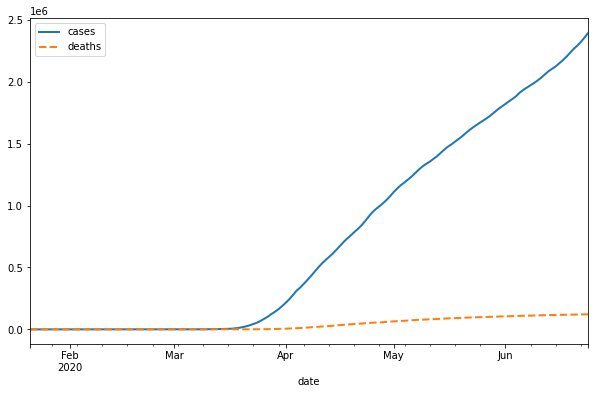

In [23]:
data[['cases', 'deaths']].plot(figsize=(10, 6),
                               style=['-', '--'],
                               lw=2)

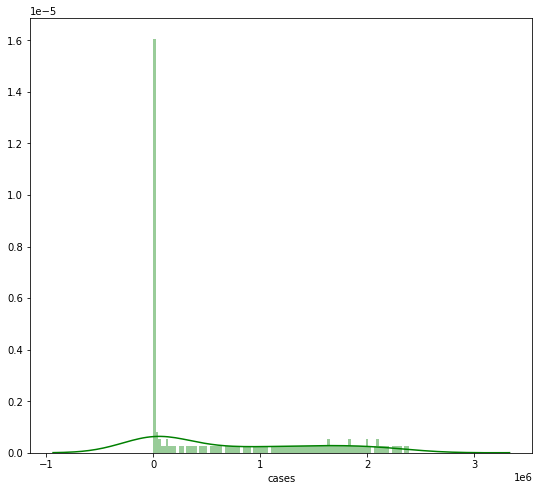

In [24]:
plt.figure(figsize=(9, 8))
sns.distplot(data['cases'], color='g', bins=100, hist_kws={'alpha': 0.4});

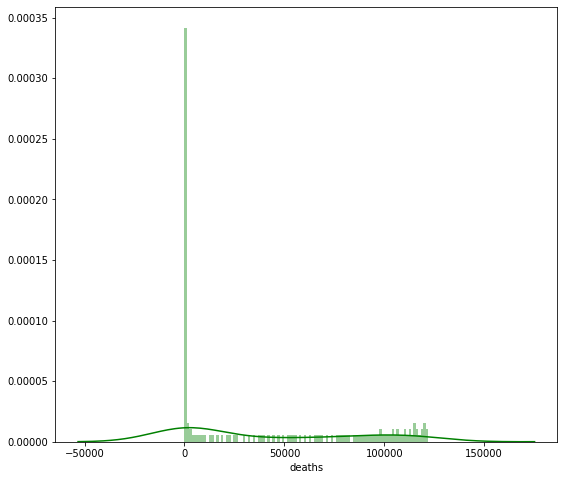

In [26]:
plt.figure(figsize=(9, 8))
sns.distplot(data['deaths'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [27]:
data.corr()

,cases,deaths
cases,1.000000,0.996566
deaths,0.996566,1.000000


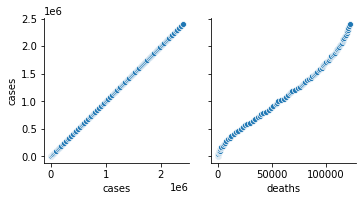

In [28]:
for i in range(0, len(data.columns), 2):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+2],
                y_vars=['cases'])

In [29]:
import statsmodels.formula.api as smf

In [42]:
model = smf.ols('deaths ~ cases', data = data)
model = model.fit()

In [43]:
model.params

Intercept   -948.184317
cases          0.056820
dtype: float64

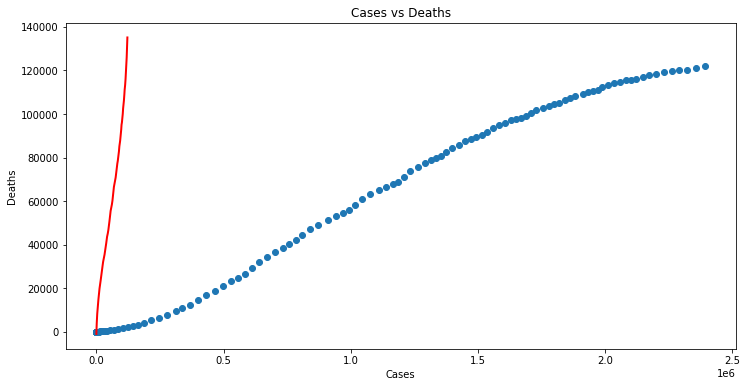

In [44]:
# Predict values
deaths_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['cases'], data['deaths'], 'o')           # scatter plot showing actual data
plt.plot(data['deaths'], deaths_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.title('Cases vs Deaths')

plt.show()

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
predictors = ['cases']
X = data[predictors]
y = data['deaths']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [47]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -948.1843169348431
betas = [0.05682023]


In [50]:
# Choice of Visualization (25%) - The chosen visualizations present an innovative solution 
#beyond being simply appropriate for the selected data structure - any ideas for Tableu? Animation?

In [51]:
# Consistency of Visual Language (25%) - The visualization is not only legible due to appropriate choice of colors, placement of visual forms, labeling, and annotation, 
# but demonstrates a high level of design competency - any suggestions for colors?

In [52]:
# Analysis in Post (20%) - Post includes a full analysis of questions about data, data sources, variables, methods, and findings. 
#Post includes insightful patterns, similarities, or differences.

In [ ]:
# Writing (5%) - Uses clear language to accurately express ideas and explain concepts. 
# No errors related to organization, grammar, style, or citations.